<a href="https://colab.research.google.com/github/ElenaRomanovaCO/Create-DynamoDBTable-Using-CloudFormation/blob/main/multilinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

importing dataset as csv file

In [5]:
dataset = pd.read_csv("covid_data.csv")
dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
dataset

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911
...,...,...,...,...,...
65,76,High,4,80,39010
66,35,Moderate,0,92,91141
67,13,Moderate,0,94,112101
68,82,High,3,73,42010


encoding categorical data - body temp column from string to set of flot values: 0.0, 0.0, 0.1 - (high, low, moderate)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
X

array([[0.0, 0.0, 1.0, 10, 0, 97],
       [1.0, 0.0, 0.0, 80, 0, 92],
       [0.0, 1.0, 0.0, 10, 0, 97],
       [1.0, 0.0, 0.0, 81, 4, 75],
       [0.0, 0.0, 1.0, 12, 0, 97],
       [0.0, 1.0, 0.0, 18, 0, 66],
       [0.0, 0.0, 1.0, 13, 0, 93],
       [1.0, 0.0, 0.0, 94, 4, 64],
       [1.0, 0.0, 0.0, 86, 2, 76],
       [0.0, 0.0, 1.0, 20, 0, 92],
       [0.0, 0.0, 1.0, 15, 0, 94],
       [0.0, 0.0, 1.0, 15, 0, 92],
       [0.0, 1.0, 0.0, 16, 0, 92],
       [0.0, 0.0, 1.0, 17, 0, 93],
       [0.0, 0.0, 1.0, 18, 0, 93],
       [0.0, 0.0, 1.0, 19, 0, 92],
       [0.0, 0.0, 1.0, 19, 0, 89],
       [0.0, 0.0, 1.0, 12, 0, 97],
       [0.0, 0.0, 1.0, 20, 0, 93],
       [0.0, 0.0, 1.0, 24, 0, 92],
       [0.0, 0.0, 1.0, 25, 0, 93],
       [1.0, 0.0, 0.0, 59, 2, 68],
       [1.0, 0.0, 0.0, 63, 1, 66],
       [0.0, 0.0, 1.0, 25, 1, 62],
       [1.0, 0.0, 0.0, 26, 0, 94],
       [0.0, 1.0, 0.0, 26, 0, 97],
       [0.0, 0.0, 1.0, 28, 0, 99],
       [1.0, 0.0, 0.0, 59, 0, 69],
       [0.0, 0.0, 1.

splitting data set into training and validation data sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [10]:
X_train

array([[0.0, 0.0, 1.0, 15, 0, 94],
       [0.0, 0.0, 1.0, 40, 0, 90],
       [1.0, 0.0, 0.0, 53, 1, 55],
       [1.0, 0.0, 0.0, 58, 0, 70],
       [1.0, 0.0, 0.0, 86, 3, 71],
       [0.0, 0.0, 1.0, 30, 0, 86],
       [0.0, 0.0, 1.0, 18, 0, 93],
       [0.0, 0.0, 1.0, 13, 0, 94],
       [0.0, 0.0, 1.0, 24, 0, 92],
       [0.0, 0.0, 1.0, 29, 0, 93],
       [1.0, 0.0, 0.0, 78, 2, 71],
       [0.0, 0.0, 1.0, 35, 0, 89],
       [0.0, 0.0, 1.0, 20, 0, 93],
       [0.0, 0.0, 1.0, 10, 0, 97],
       [0.0, 0.0, 1.0, 19, 0, 92],
       [0.0, 1.0, 0.0, 18, 0, 66],
       [0.0, 0.0, 1.0, 19, 0, 89],
       [0.0, 0.0, 1.0, 25, 0, 93],
       [0.0, 0.0, 1.0, 35, 0, 92],
       [1.0, 0.0, 0.0, 86, 2, 76],
       [0.0, 0.0, 1.0, 17, 0, 93],
       [0.0, 1.0, 0.0, 26, 0, 97],
       [1.0, 0.0, 0.0, 56, 2, 76],
       [0.0, 0.0, 1.0, 12, 0, 97],
       [1.0, 0.0, 0.0, 68, 1, 67],
       [0.0, 0.0, 1.0, 49, 0, 80],
       [1.0, 0.0, 0.0, 74, 2, 75],
       [1.0, 0.0, 0.0, 36, 1, 90],
       [1.0, 0.0, 0.

In [11]:
y_train

array([101000,  87019,  50104,  63091,  41891,  91002,  99004, 112101,
        95202,  92101,  52001,  90124,  97101, 127181,  98191,  99110,
        98081,  95010,  91141,  45019,  99910,  99008,  60801, 110911,
        59010,  77010,  58010,  90191,  67010,  61004,  56095, 100000,
        59913,  92010, 110101,  78010,  71019,  61002,  98101,  57019,
        73010,  87005])

In [12]:
X_test

array([[0.0, 0.0, 1.0, 28, 0, 99],
       [1.0, 0.0, 0.0, 59, 0, 69],
       [0.0, 0.0, 1.0, 32, 0, 89],
       [1.0, 0.0, 0.0, 63, 1, 66],
       [0.0, 0.0, 1.0, 48, 0, 93],
       [1.0, 0.0, 0.0, 90, 3, 67],
       [1.0, 0.0, 0.0, 94, 4, 64],
       [1.0, 0.0, 0.0, 64, 1, 73],
       [0.0, 0.0, 1.0, 34, 1, 90],
       [1.0, 0.0, 0.0, 84, 3, 75],
       [1.0, 0.0, 0.0, 62, 1, 68],
       [0.0, 0.0, 1.0, 28, 0, 89],
       [0.0, 0.0, 1.0, 30, 0, 62],
       [1.0, 0.0, 0.0, 40, 0, 92],
       [0.0, 0.0, 1.0, 32, 0, 84],
       [0.0, 0.0, 1.0, 61, 0, 90],
       [1.0, 0.0, 0.0, 82, 3, 73],
       [0.0, 0.0, 1.0, 70, 1, 88],
       [1.0, 0.0, 0.0, 61, 2, 76],
       [0.0, 0.0, 1.0, 12, 0, 97],
       [1.0, 0.0, 0.0, 76, 4, 80],
       [1.0, 0.0, 0.0, 54, 1, 70],
       [0.0, 1.0, 0.0, 10, 0, 97],
       [1.0, 0.0, 0.0, 38, 2, 75],
       [0.0, 0.0, 1.0, 15, 0, 92],
       [1.0, 0.0, 0.0, 81, 4, 75],
       [1.0, 0.0, 0.0, 60, 1, 68],
       [1.0, 0.0, 0.0, 46, 0, 91]], dtype=object)

In [13]:
y_test

array([ 93010,  66019,  91019,  59994,  83891,  46016,  37914,  62001,
        90001,  42099,  61018,  93091,  75012,  88012,  90015,  71191,
        42010,  67019,  62019, 110911,  39010,  61082, 111911,  78004,
       102019,  39010,  62019,  84008])

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision= 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[ 98523.191  93010.   ]
 [ 65402.264  66019.   ]
 [ 91633.957  91019.   ]
 [ 59006.199  59994.   ]
 [ 83371.86   83891.   ]
 [ 37389.494  46016.   ]
 [ 30993.428  37914.   ]
 [ 61449.821  62001.   ]
 [ 88243.989  90001.   ]
 [ 44653.711  42099.   ]
 [ 60509.248  61018.   ]
 [ 94138.001  93091.   ]
 [ 81045.966  75012.   ]
 [ 87382.408  88012.   ]
 [ 89441.362  90015.   ]
 [ 73918.161  71191.   ]
 [ 45028.695  42010.   ]
 [ 64830.56   67019.   ]
 [ 62066.945  62019.   ]
 [107662.326 110911.   ]
 [ 49277.928  39010.   ]
 [ 66394.372  61082.   ]
 [110895.003 111911.   ]
 [ 76026.676  78004.   ]
 [103591.699 102019.   ]
 [ 43955.278  39010.   ]
 [ 61761.269  62019.   ]
 [ 83187.824  84008.   ]]


In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [20]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 14331214.06070603
Root Mean Squared Error: 3785.6589995278273


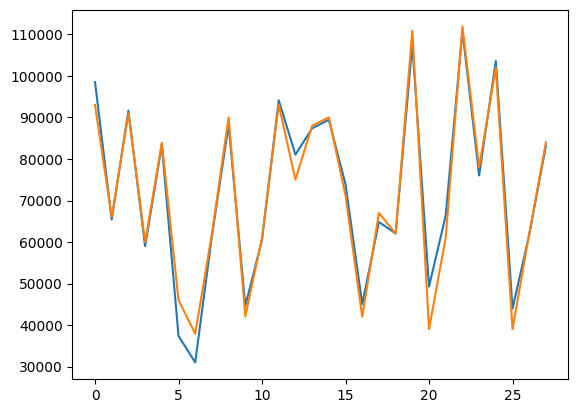

In [21]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [23]:
print('Train Score: ', regressor.score(X_train, y_train))
print('Test Score: ', regressor.score(X_test, y_test))

Train Score:  0.9518737372624644
Test Score:  0.9692315291948641


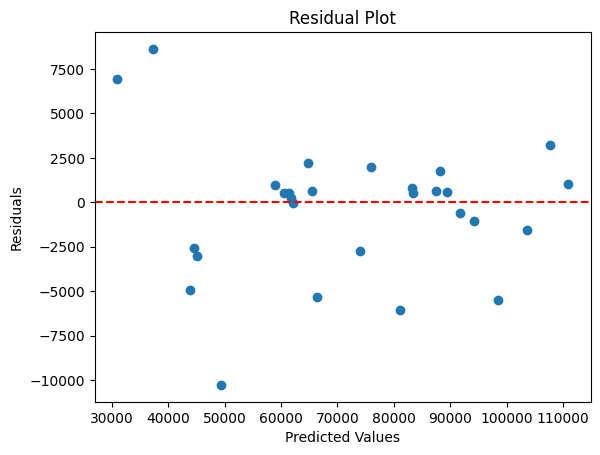

In [25]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

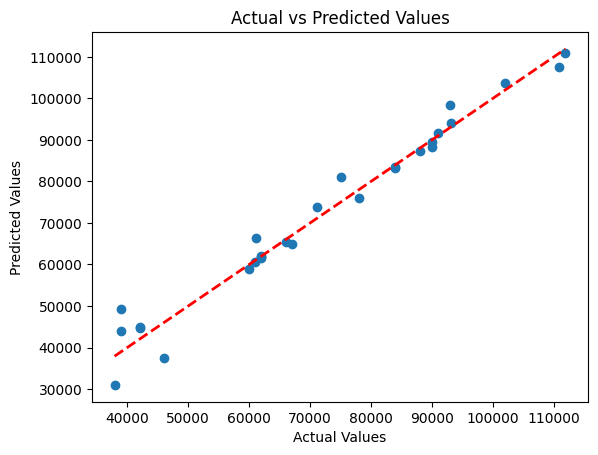

In [26]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [31]:
# Assuming you have a trained model with coefficients
feature_names = X['age']  # replace with your actual feature names
coefficients = model.coef_

plt.bar(feature_names, coefficients)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

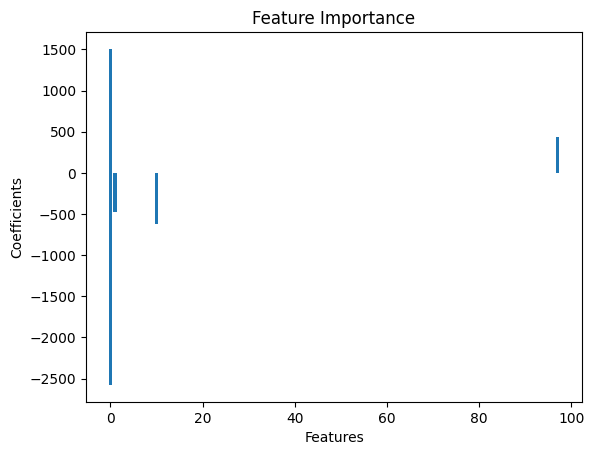

In [34]:
feature_names = X[0] # replace with your actual feature names
coefficients = regressor.coef_

plt.bar(feature_names, coefficients)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()